# EDA of the PUBG data
Import the neccessary libraries for describing and visualising the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Reading the data in.
We read the data into the environement, to investigate any relationships with the different features.

Here the data is seperated into training and testing set. The training data is what we will be looking at extensively in this post. The Testing data doesn't contain the target variable, but will be used when developing the model to validate our assumptions on what features we use.

We will use the fact that the Training data has our target variable to assist in developing some insight on what features are imoprtant.

In [2]:
# Extract the testing and train data into a dataframe
# There was a data leak in the orginal data set, so a new data set was realeased (V2)
train = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')

In [3]:
# Lets take a quick look at the data
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### Missing Values
Lets make sure we dont have any missing values.

In [4]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
# We have 1 Nan in our target variable
train[train['winPlacePerc'].isna() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [6]:
# Lets have a look at all the players in this match
matchId = '224a123c53e008'
data = train[train['matchId'] == matchId]
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


There is only 1 player identified in this match (matchID = 224a123c53e008). Since there needs to be more than one player to play the game in order to win, we make the assumption that this matchID is invalid. So, we will remove this match from the training set.

In [7]:
# Remove the data where the target variable is NULL; include a sanity check
print ('length of the training set before: ',len(train))
train = train[train['winPlacePerc'].isna() != True]
print ('length of the training set after: ',len(train))

length of the training set before:  4446966
length of the training set after:  4446965


## The Exploratory Part.
Here We look at the different features associated will the number of kills by a player.

### 1. Number of enemys the player killed
This is the number of enemy players that were killed by each player.

In [8]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players'.format(train['kills'].mean()))
print('50% of people have ',train['kills'].quantile(0.50),' kills or less')
print('75% of people have ',train['kills'].quantile(0.75),' kills or less')
print('99% of people have ',train['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', train['kills'].max())

The average person kills 0.9248 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


Lets see this in a different way. Here is a plot of the number of players that make 1, 2, 3, ... 8+ kills in a game

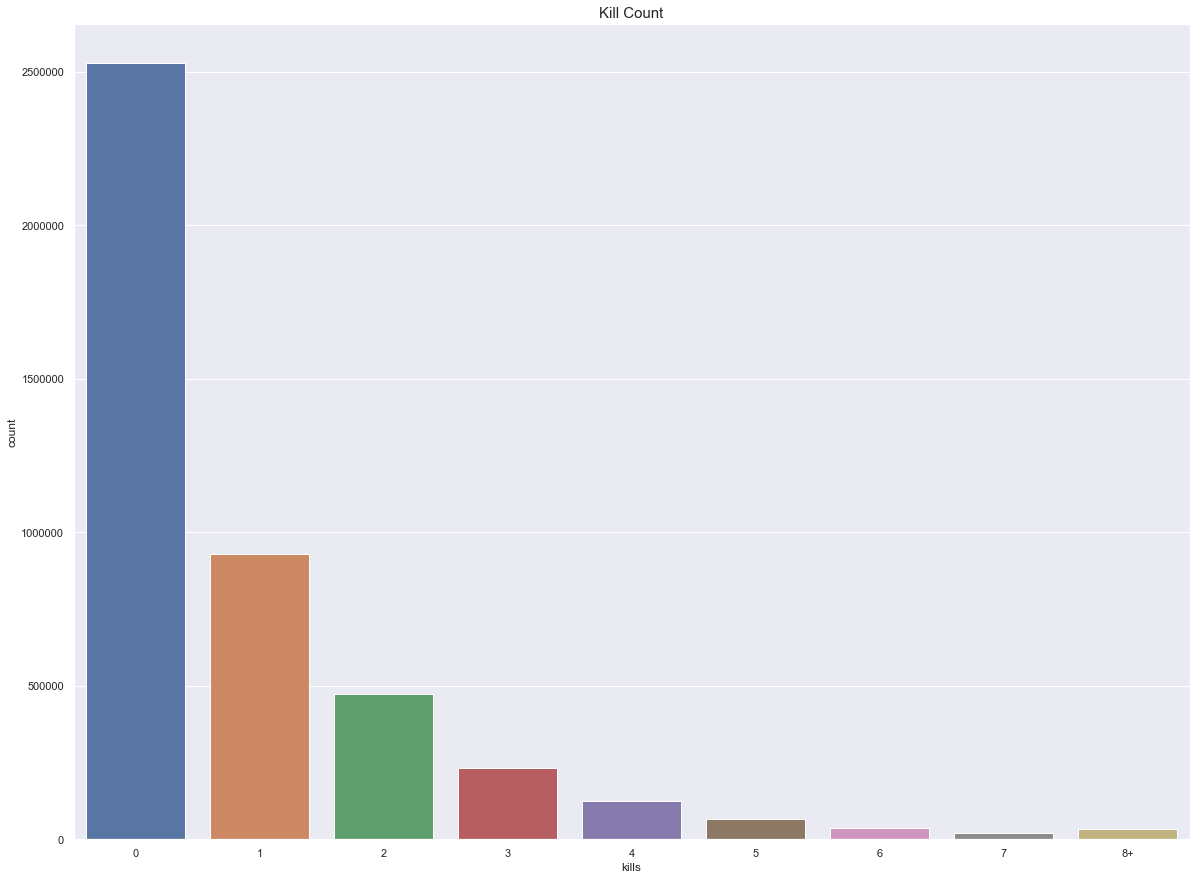

In [9]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()

### 2. Maximum number of enemy players killed in a short time.
This is the number of enemy players killed in a short time by each player (It is not clear on how long a "short time" is).

In [10]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players in a short time'.format(train['killStreaks'].mean()))
print('50% of people have ',train['killStreaks'].quantile(0.50),' kills or less in a short time')
print('75% of people have ',train['killStreaks'].quantile(0.75),' kills or less in a short time')
print('99% of people have ',train['killStreaks'].quantile(0.99),' kills or less in a short time')
print('While the most kills in a row recorded in the data is', train['killStreaks'].max())

The average person kills 0.5440 players in a short time
50% of people have  0.0  kills or less in a short time
75% of people have  1.0  kills or less in a short time
99% of people have  3.0  kills or less in a short time
While the most kills in a row recorded in the data is 20


Lets have a look at the data for this and see if there is any correlation to our target variable "winPlacePerc".

A correlation between two random vairables describes a statistical association, which basically means how close these two random variables are to having a linear relation ship. The correlation can range between -1 and 1:

- A correlation of 1 means the variables are perfectly correlated.
- A correlation of 0 means there is no corerlation between teh variables.
- A corerlation of -1 means the variabels are prefectly negatively corerlated (This means an increase in variable 1 dsecribes a decrease in variable 2).

*However, we do want to be carefull NOT to assume that a correlation between two variables means a causation*

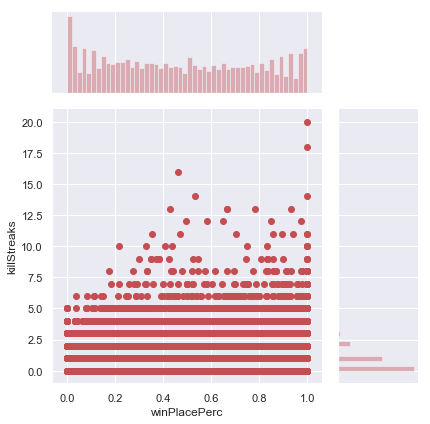

In [15]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=train, ratio=3, color='r')
plt.show()

### 3. Number of kills while in a vehicle
This is the number of enemy players killed while in a vehicle.

In [13]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players from a vehicle'.format(train['roadKills'].mean()))
print('50% of people have ',train['roadKills'].quantile(0.50),' kills or less from a vehicle')
print('75% of people have ',train['roadKills'].quantile(0.75),' kills or less from a vehicle')
print('99% of people have ',train['roadKills'].quantile(0.99),' kills or less from a vehicle')
print('While the most kills recorded from a vehicle in the data is', train['roadKills'].max())

The average person kills 0.0035 players from a vehicle
50% of people have  0.0  kills or less from a vehicle
75% of people have  0.0  kills or less from a vehicle
99% of people have  0.0  kills or less from a vehicle
While the most kills recorded from a vehicle in the data is 18


Very few players kill enemies from a vehicle. This is most likely due to 2 things:

1. Its hard to shoot accurately from a moving vehicle
2. My hypothesis is, that vehicles are used to escape bad situations.

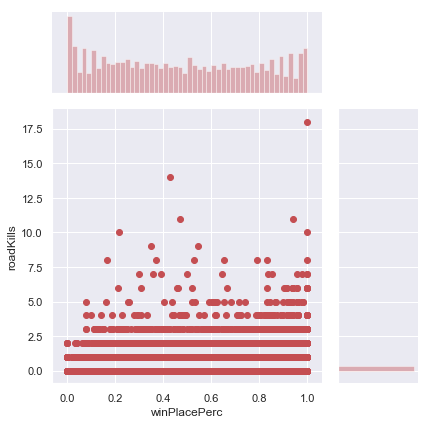

In [16]:
sns.jointplot(x='winPlacePerc', y='roadKills', data=train, ratio=3, color='r')
plt.show()

We can see there is very little correlation with making kills from a vehicle and predicting the winPlacePerc.

---

### 4. Number of times a player killed a team mate
This is the numberof times a team member kills one of there own team.

I dont think i'd wont one of these people on my team.



In [17]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players on their own team'.format(train['teamKills'].mean()))
print('50% of people have killed ',train['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',train['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',train['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', train['teamKills'].max())

The average person kills 0.0239 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 12


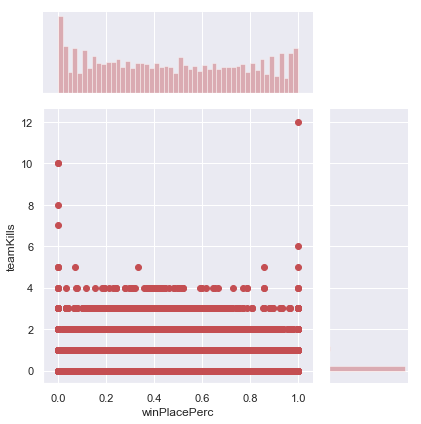

In [18]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=train, ratio=3, color='r')
plt.show()


Thats a relief, there is virtually no correlation with the number of team mates you kill and the winPlacePerc. If there was, you would need to keep a close eye on your team mates in a squade game.

---

### 5. What about the head shot kills?
This is the number of enemies that have been killed with a head shot.

In order to make a head shot, you either have to be pretty closer or a pretty good shot.

In [19]:
# Summary statistics for the number of kills
print('The average person make {:.4f} head shots'.format(train['headshotKills'].mean()))
print('75% of people make {:.2f} head shots ',format(train['headshotKills'].quantile(0.75)))
print('99% of people make {:.2f} head shots ',format(train['headshotKills'].quantile(0.99)))
print('while the most head shots recorded in the data is', train['headshotKills'].max())

The average person make 0.2268 head shots
75% of people make {:.2f} head shots  0.0
99% of people make {:.2f} head shots  3.0
while the most head shots recorded in the data is 64


I wonder if the player that made all those head shots is the same player that had the most kills?

*Spoiler Alert*: Yes

In [20]:
train[train['headshotKills'] == train['headshotKills'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


### 6. Damage to enemy players
We've seen that most people aren't able to kill any one, so maybe they inflict some damage to their enemies

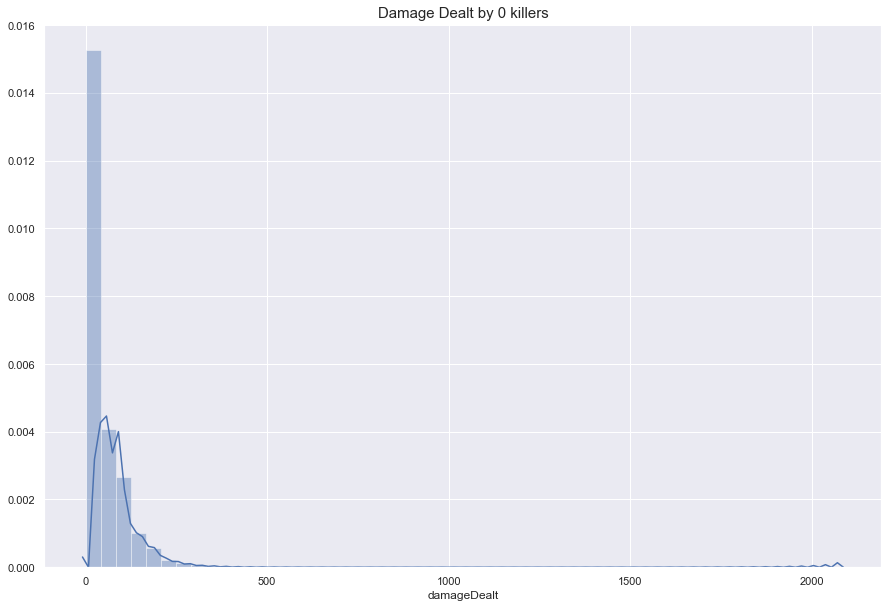

In [21]:
data = train.copy()

# Keep only those players that didn't kill anyone
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

Here, we see a distribution of how much damage, players that dont kill anyone, can inflict on there enemies. You can see that most players dont deal out too much, this is most likely all the new players trying to figure out the controls and getting to know the game while they continually get beaten up by the more expereince players.

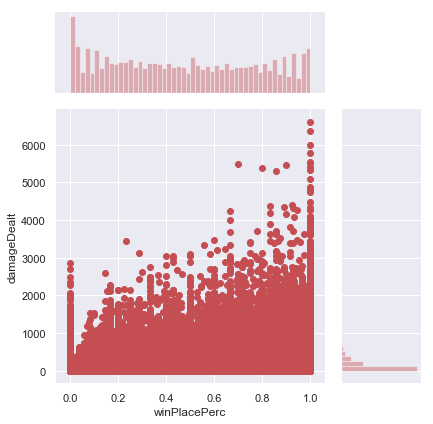

In [22]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=train, ratio=3, color='r')
plt.show()

There is a reasonable correlation here with the damadge you deal out to enemey players and the winPlacePerc.

---

## How does distance travelled fare
Here we will look at the differnt forms of distance travelled and see if this has any predictive power for our tarrget variable.

We might assume that the further a player has travelled, the more likely they are to at least reach the final 10-15 players and have a higher "winPlacePerc"

### 7. Running
This is the distance travelled in metres by foot. This will be the majority of the distance for most players.

In [23]:
# Summary statistics for the distance walked.
print('The average person walks/runs {:.2f} m'.format(train['walkDistance'].mean()))
print('25% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.25)))
print('50% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.50)))
print('75% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.75)))
print('99% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.99)))
print('The longest distance travelled by feet in the data is {:.2f} m'.format(train['walkDistance'].max()))

The average person walks/runs 1154.22 m
25% of people have walked/ran 155.10 m or less
50% of people have walked/ran 685.60 m or less
75% of people have walked/ran 1976.00 m or less
99% of people have walked/ran 4396.00 m or less
The longest distance travelled by feet in the data is 25780.00 m


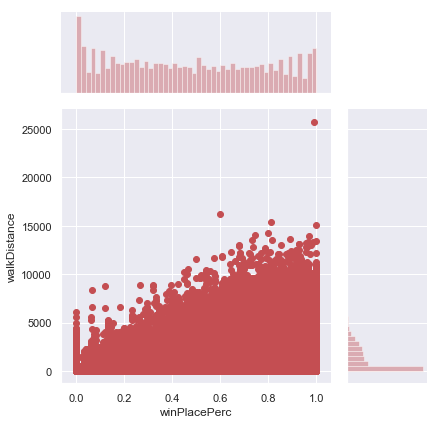

In [24]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=train, ratio=3, color='r')
plt.show()

The distance travelled by foot seems to have a higher correlation to the final position. We'll have a closer look at this later with the total distance travelled (combining walking, driving, swiming). For now, how does this compare the driving and swimming?

---

### 8. Driving
This is the distance in metres, travelled by vehicle.

In [25]:
# Summary statistics for the distance drove
print('The average person drove {:.2f} m'.format(train['rideDistance'].mean()))
print('50% of people have drove {:.2f} m or less'.format(train['rideDistance'].quantile(0.50)))
print('75% of people have drove {:.2f} m or less'.format(train['rideDistance'].quantile(0.75)))
print('99% of people have drove {:.2f} m or less'.format(train['rideDistance'].quantile(0.99)))
print('The longest distance travelled by vehicle in the data is {:.2f} m'.format(train['rideDistance'].max()))

The average person drove 606.12 m
50% of people have drove 0.00 m or less
75% of people have drove 0.19 m or less
99% of people have drove 6966.00 m or less
The longest distance travelled by vehicle in the data is 40710.00 m


It seems that at least 50% of people dont get there licence.

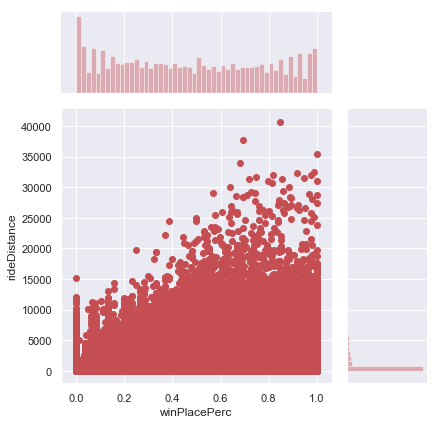

In [26]:
sns.jointplot(x='winPlacePerc', y='rideDistance', data=train, ratio=3, color='r')
plt.show()

There is some correlation with driving distance, but not as strong as walking. This is likely due to the fact that not many people actualy get a licence and drive a vehicle.

---

### 9. Swimming
This is the distance in metres travelled through water.

In [27]:
# Summary statistics for the distance drove
print('The average person drove {:.2f} m'.format(train['swimDistance'].mean()))
print('75% of people have drove {:.2f} m or less'.format(train['swimDistance'].quantile(0.75)))
print('99% of people have drove {:.2f} m or less'.format(train['swimDistance'].quantile(0.99)))
print('The longest distance travelled by vehicle in the data is {:.2f} m'.format(train['swimDistance'].max()))

The average person drove 4.51 m
75% of people have drove 0.00 m or less
99% of people have drove 123.00 m or less
The longest distance travelled by vehicle in the data is 3823.00 m


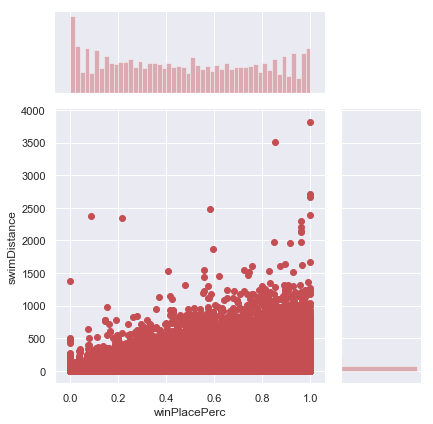

In [28]:
sns.jointplot(x='winPlacePerc', y='swimDistance', data=train, ratio=3, color='r')
plt.show()

We see that at least 75% of people dont even go in the water, this is likely related to the specific map the game is played on. Looking at the [maps] indicates that there is very little water to swim through, som e maps have less water than others.

Perhaps it is not a surprise then, that the correlation between swimming distance and winPlacePerc is low.

---

### 10. Total distance travelled
This is not an existing feature in the data, but we can combine the distance features to forma a total distance measure, so see if this has any predictive power of our target variable.

[maps]:(https://pubg.gamepedia.com/Maps)

In [29]:
# Create a new feature for total distance travelled
data = train[['winPlacePerc']].copy()
data['totalDistance'] = train['walkDistance'] + train['rideDistance'] + train['swimDistance']

# Summary statistics for the total distance travelled
print('The average person travelled {:.2f} m'.format(data['totalDistance'].mean()))
print('25% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.25)))
print('50% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.50)))
print('75% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.75)))
print('99% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.99)))
print('The longest distance travelled in the data is {:.2f} m'.format(data['totalDistance'].max()))

The average person travelled 1764.84 m
25% of people have travelled 158.10 m or less
50% of people have travelled 788.20 m or less
75% of people have travelled 2728.46 m or less
99% of people have travelled 9309.00 m or less
The longest distance travelled in the data is 41270.10 m


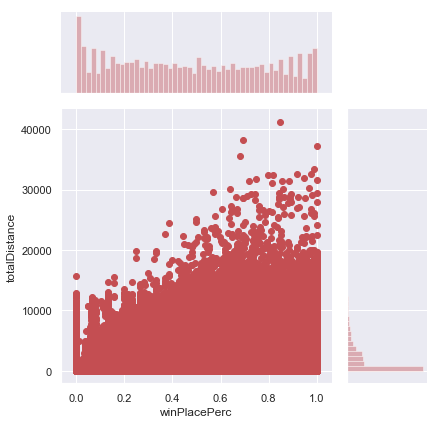

In [30]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='r')
plt.show()

There is a reasonably strong correlation with the total distance travelled and winning, although most of this correlation may just be due to the strong correlation with walking distance and winPlacePerc. However, one interesting item to note is that it looks like the person that travelled the longest distance didn't win, when they travelled over 41 kms in a single match.

---

## Other player features
This can include many of the other player features available, but we'll only focus on a few.

### 11. How does Healing and using Boosts affect the result
1. Healing items are used to heal yourself after you've been injured, which improves your health and allows you to continue palying the game for longer
2. Boost items are used by a player to increase speed and accuracy, which will allow a player to achieve more kills with weapons or get away from a fight faster.

In [31]:
# Summary statistics for the number of healing items used
print('The average person uses {:.2f} healing items'.format(train['heals'].mean()))
print('50% of people used {:.2f} healing items'.format(train['heals'].quantile(0.50)))
print('75% of people used {:.2f} healing items or less'.format(train['heals'].quantile(0.75)))
print('99% of people used {:.2f} healing items or less'.format(train['heals'].quantile(0.99)))
print('The doctor of the data used {:.2f} healing items'.format(train['heals'].max()))

The average person uses 1.37 healing items
50% of people used 0.00 healing items
75% of people used 2.00 healing items or less
99% of people used 12.00 healing items or less
The doctor of the data used 80.00 healing items


In [32]:
# Descriptive statistics for the number of boosting items used
print('The average person uses {:.2f} boosting items'.format(train['boosts'].mean()))
print('50% of people used {:.2f} boosting items'.format(train['boosts'].quantile(0.50)))
print('75% of people used {:.2f} boosting items or less'.format(train['boosts'].quantile(0.75)))
print('99% of people used {:.2f} boosting items or less'.format(train['boosts'].quantile(0.99)))
print('The addict of the data used {:.2f} boosting items'.format(train['boosts'].max()))

The average person uses 1.11 boosting items
50% of people used 0.00 boosting items
75% of people used 2.00 boosting items or less
99% of people used 7.00 boosting items or less
The addict of the data used 33.00 boosting items


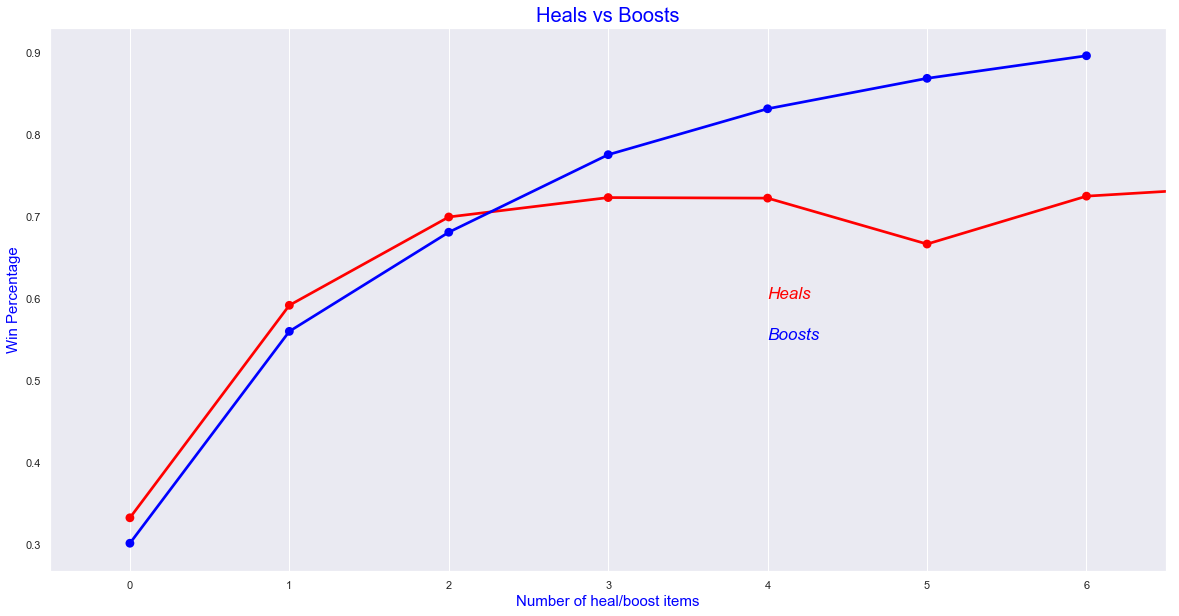

In [33]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=1.0)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

plt.show()

Here we can see how the heal items and boost items ae used compared to each other.

This seems to indicate that using a few healing items increases your chance of winning, but you need to use more boosts to actaully achieve a change of winning.

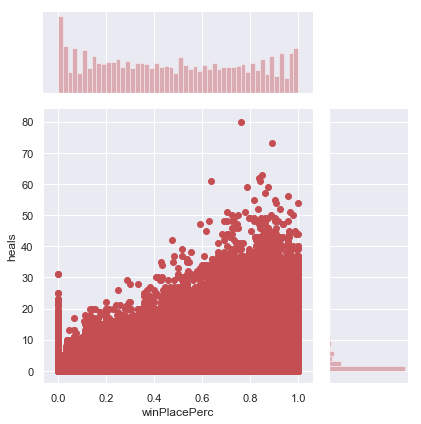

In [34]:
sns.jointplot(x='winPlacePerc', y='heals', data=train, ratio=3, color='r')
plt.show()

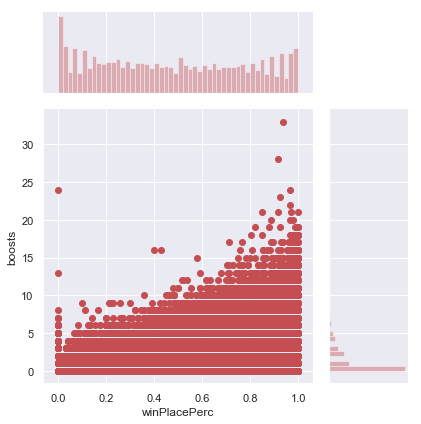

In [35]:
sns.jointplot(x='winPlacePerc', y='boosts', data=train, ratio=3, color='r')
plt.show()

There is a higher correlation with boosts with the winPlacePerc than there is with the heals, but both features look like they could be usefull.

---

## Game features
This will include the features specific to the game, such as teh game duration, the humber of teams/players in a game.

### 12. Does the match duration impact the winning percentage?
The match duration is simply, the time in seconds a game takes to copmplete.

You would think that the match duration has reaosnable predictive power on determining the winner, since the winner has to stay alive for the longest.

In [37]:
data = train.copy()
# Summary statistics for the total rankPoints
print('The average person lasts {:.2f} seconds'.format(data['matchDuration'].mean()))
print('The shortest game lasted {:.1f} seconds'.format(data['matchDuration'].min()))
print('25% of people last {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.25)))
print('50% of people have {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.50)))
print('75% of people have {:.1f} seconds or less'.format(data['matchDuration'].quantile(0.75)))
print('99% of people have {:.1f} secondsor less'.format(data['matchDuration'].quantile(0.99)))
print('The longest game lasted {:.1f} seconds'.format(data['matchDuration'].max()))

The average person lasts 1579.51 seconds
The shortest game lasted 133.0 seconds
25% of people last 1367.0 seconds or less
50% of people have 1438.0 seconds or less
75% of people have 1851.0 seconds or less
99% of people have 2052.0 secondsor less
The longest game lasted 2237.0 seconds


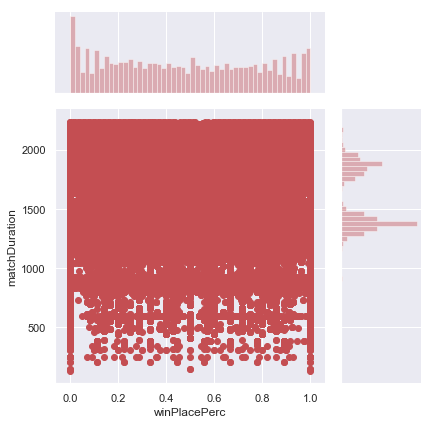

In [38]:
sns.jointplot(x='winPlacePerc', y='matchDuration', data=data, ratio=3, color='r')
plt.show()

In [39]:
data.corr()['winPlacePerc']['matchDuration']

-0.0051713142354430554

We can see that there are many games that last a varying amount of time with varying results. Its clear that there is no predictive power in this feature.

Lets have a look at the match duration for all the winners.

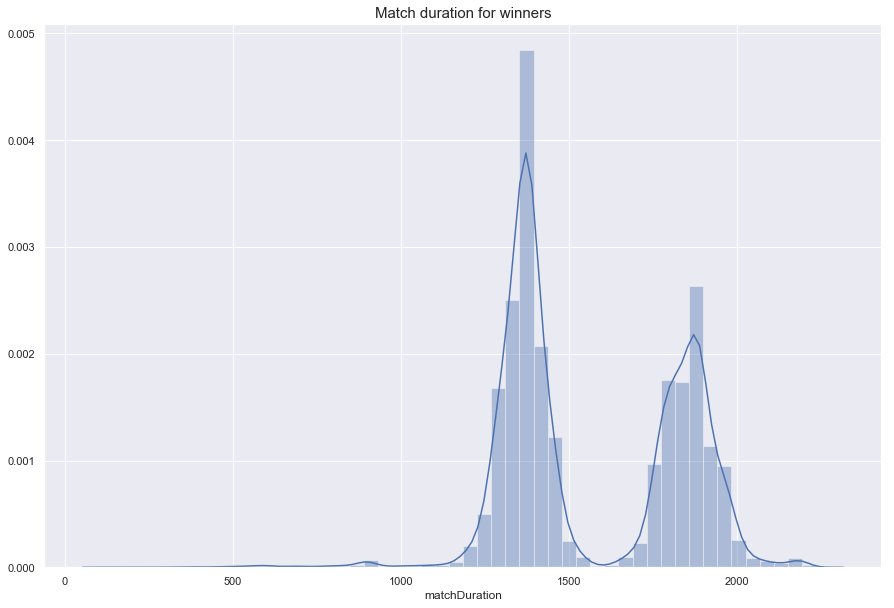

In [40]:
# Keep only the players that won the match
data = train[train['winPlacePerc'] == 1]

plt.figure(figsize=(15,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])
plt.show()

It appears that the match duration has no bearing on the winPlacePerc. Apparently you can even win the game in just over 2 min, but more commonly the game is won in approximately 1400 or 1850 seconds.

The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.

---

### 13. What about the number of players in a game

In [41]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

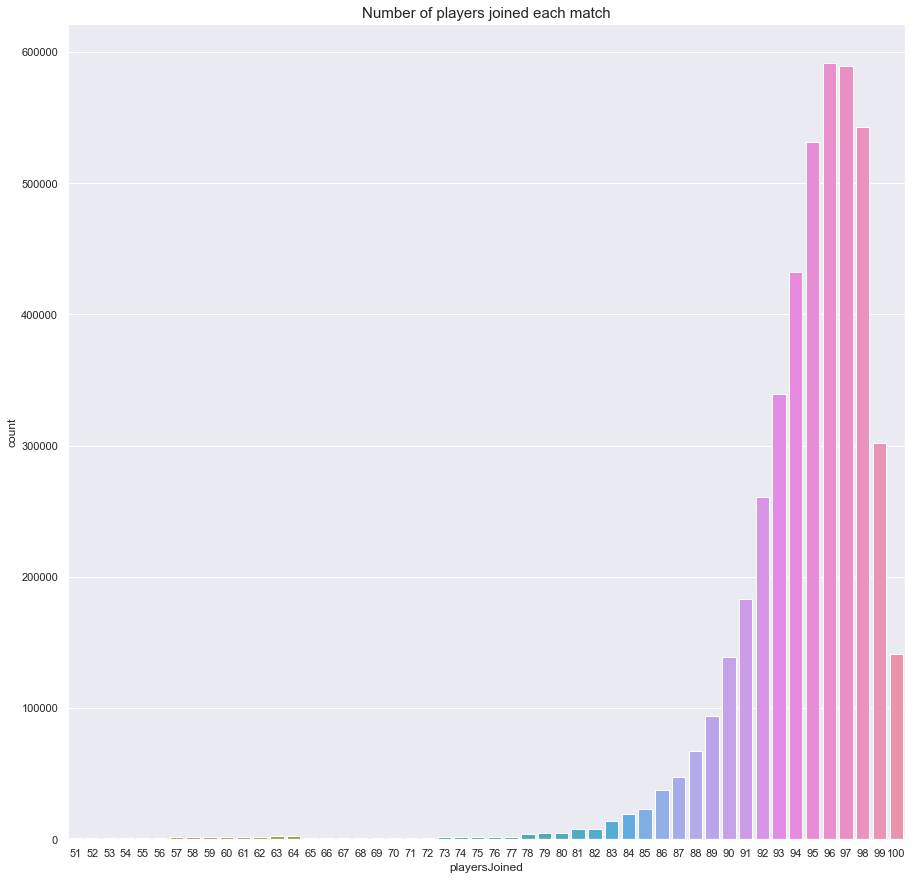

In [42]:
# Lets look at only those matches with more than 50 players.
data = train[train['playersJoined'] > 50]

plt.figure(figsize=(15,15))
sns.countplot(data['playersJoined'].sort_values())
plt.title('Number of players joined each match',fontsize=15)
plt.show()

There are a few games where there are less than 50 players, but most games will have between 90 and 100 players. However, not that many games are full (100 players).

This may be useful for feature enginneering.

---

### 14. What is the distribution of match type¶
There are 16 seperate modes of game play, many of which are different versions of each other with first person perspective or third person perspective. I will combine these into 4 seperate game play modes:

1. Solo: Hunger Games style, last man/women standing.
2. Duo: Teams of two against all other players.
3. Squad: Teams of up to 4 players against All other players
4. Other: These modes consist of custom and special events modes.

In [43]:
modes = set(train['matchType'])
print (modes)

{'solo', 'crashtpp', 'normal-solo', 'normal-squad-fpp', 'normal-duo', 'normal-solo-fpp', 'squad', 'solo-fpp', 'squad-fpp', 'crashfpp', 'normal-squad', 'normal-duo-fpp', 'flarefpp', 'flaretpp', 'duo', 'duo-fpp'}


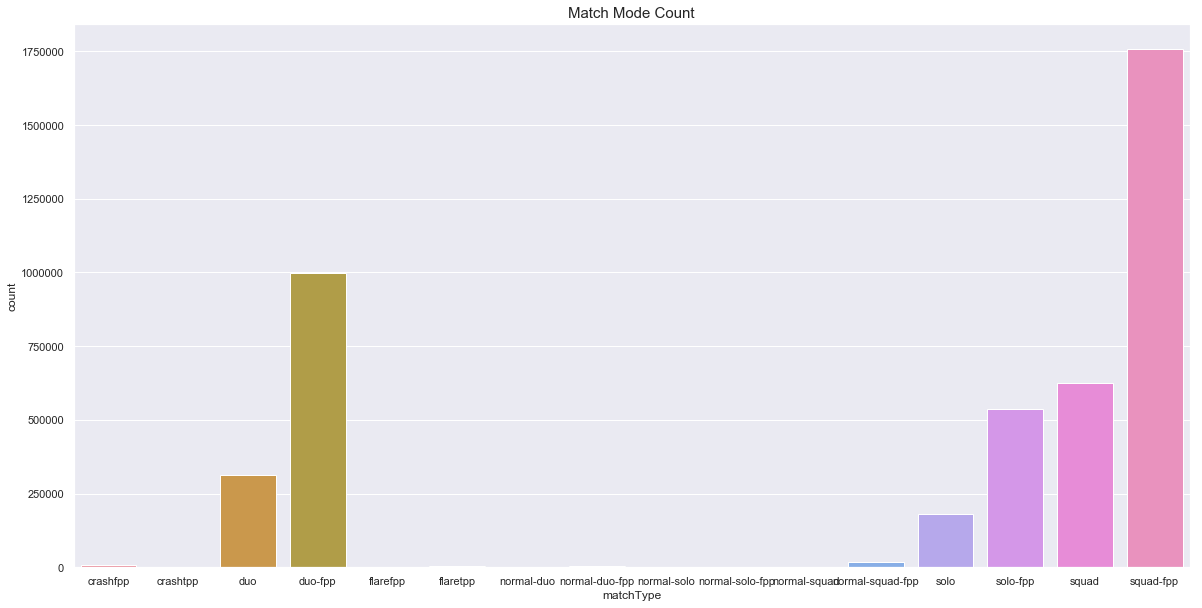

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(train['matchType'].sort_values())
plt.title('Match Mode Count',fontsize=15)
plt.show()

Lets create a function to standardises the matchType feature in our data.

In [45]:
def standard_matchType(data):
    data['matchType'][data['matchType'] == 'normal-solo'] = 'solo'
    data['matchType'][data['matchType'] == 'solo-fpp'] = 'solo'
    data['matchType'][data['matchType'] == 'normal-solo-fpp'] = 'solo'
    data['matchType'][data['matchType'] == 'normal-duo-fpp'] = 'duo'
    data['matchType'][data['matchType'] == 'normal-duo'] = 'duo'
    data['matchType'][data['matchType'] == 'duo-fpp'] = 'duo'
    data['matchType'][data['matchType'] == 'squad-fpp'] = 'squad'
    data['matchType'][data['matchType'] == 'normal-squad'] = 'squad'
    data['matchType'][data['matchType'] == 'normal-squad-fpp'] = 'squad'
    data['matchType'][data['matchType'] == 'flaretpp'] = 'Other'
    data['matchType'][data['matchType'] == 'flarefpp'] = 'Other'
    data['matchType'][data['matchType'] == 'crashtpp'] = 'Other'
    data['matchType'][data['matchType'] == 'crashfpp'] = 'Other'

    return data


data = train.copy()
data = standard_matchType(data)
print (set(data['matchType']))

{'solo', 'duo', 'Other', 'squad'}


Lets have a look at how many of each game mode there are.

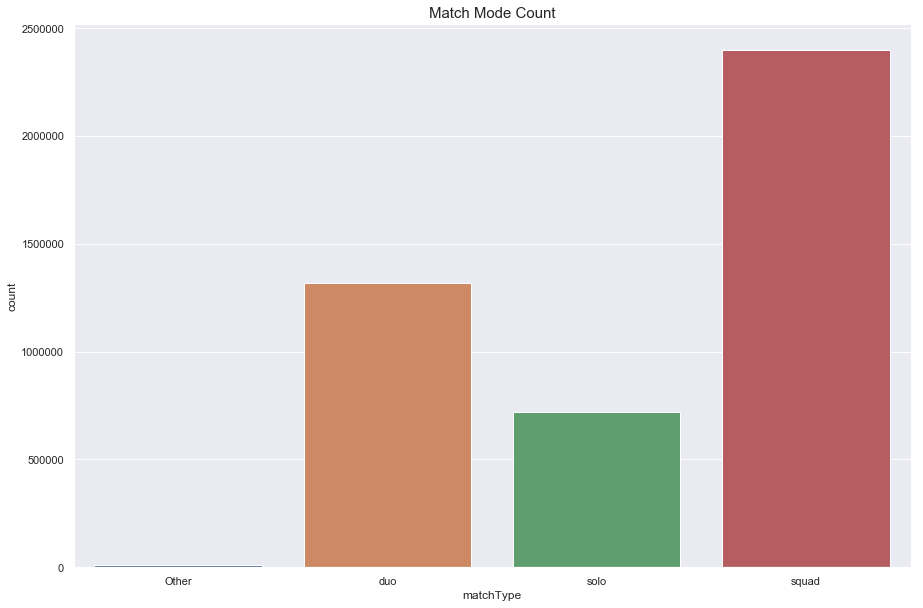

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data['matchType'].sort_values())
plt.title('Match Mode Count',fontsize=15)
plt.show()

In [47]:
solo = data[data['matchType'] == 'solo']
duo = data[data['matchType'] == 'duo']
squad = data[data['matchType'] == 'squad']
other = data[data['matchType'] == 'Other']

print("There are {0:} ({1:.2f}%) solo games,".format(len(solo),100*len(solo)/len(data)))
print("There are {0:} ({1:.2f}%) duo games,".format(len(duo),100*len(duo)/len(data)))
print("There are {0:} ({1:.2f}%) squad games,".format(len(squad),100*len(squad)/len(data)))
print("There are {0:} ({1:.2f}%) Other games,".format(len(other),100*len(other)/len(data)))

There are 720712 (16.21%) solo games,
There are 1315970 (29.59%) duo games,
There are 2400402 (53.98%) squad games,
There are 9881 (0.22%) Other games,


Most games played in this data set are squad games.

Looking at the numbers, its almost like the number of players is related to the amount of data in each match mode, ie twice as many games of duo and approx four times as many games in squad mode than there are in solo.

We saw that for the full data set, there was a person R correlation of 0.38 between `KillStreaks` and our target variable, `winPlacePer`. How does this compare if we break the data up into the four seperate match types identified?

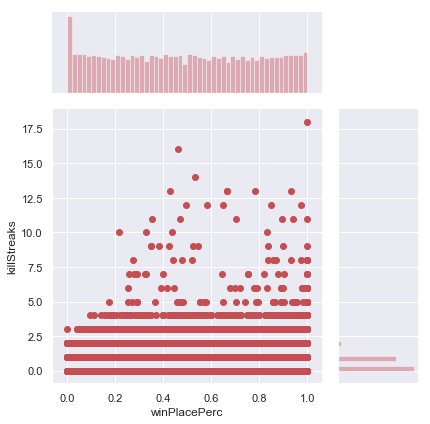

In [48]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=solo, ratio=3, color='r')
plt.show()

Looking at the correlation with `killStreaks` for just the solo games, there is a reasonable correlation with the `winPlacePer`, but not too strong.

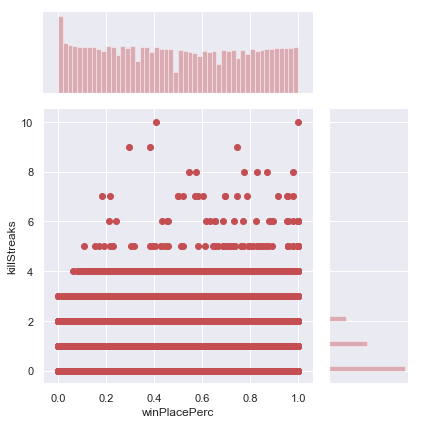

In [49]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=duo, ratio=3, color='r')
plt.show()

Looking at the correlation with `killStreaks` for just the duo games, there is a reasonable correlation with the `winPlacePer`, but not too strong.

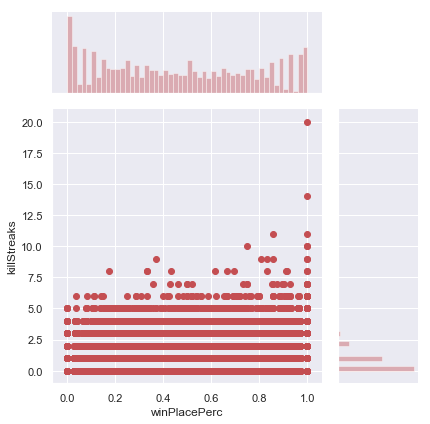

In [50]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=squad, ratio=3, color='r')
plt.show()

Looking at the correlation with `killStreaks` for just the squad games, there is a small correlation with the `winPlacePer`.



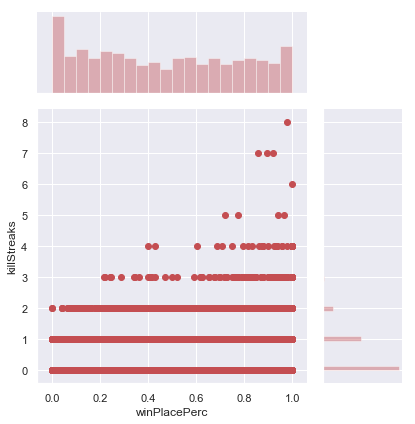

In [51]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=other, ratio=3, color='r')
plt.show()

Looking at the correlation with killStreaks for just the custom game modes, there is a small correlation with the winPlacePer.

---

### 15. Correlation of each Feature for each game mode.
We'll have a look at each game mode individually and calculate the correlation of each feature with our target variable, the `winPlacePerc`.

In [52]:
# Create a data set with the game modes seperated
data = [solo,duo,squad,other,train]
# This is just a list of all the features 
features = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals',
            'killPlace','killPoints','kills','killStreaks','longestKill',
            'maxPlace','numGroups','rankPoints','revives',
            'rideDistance','roadKills','swimDistance','teamKills',
            'vehicleDestroys','walkDistance','weaponsAcquired','winPoints']
        
# Calculate the correlation matrix for each game mode, and take only the correlation of the feature with the target variable.
solo_correlation = solo.corr()['winPlacePerc']
duo_correlation = duo.corr()['winPlacePerc']
squad_correlation = squad.corr()['winPlacePerc']
other_correlation = other.corr()['winPlacePerc']
All_correlation = train.corr()['winPlacePerc']

correlation = [solo_correlation, duo_correlation, squad_correlation, other_correlation, All_correlation]

Text(0.5, 1.0, 'All')

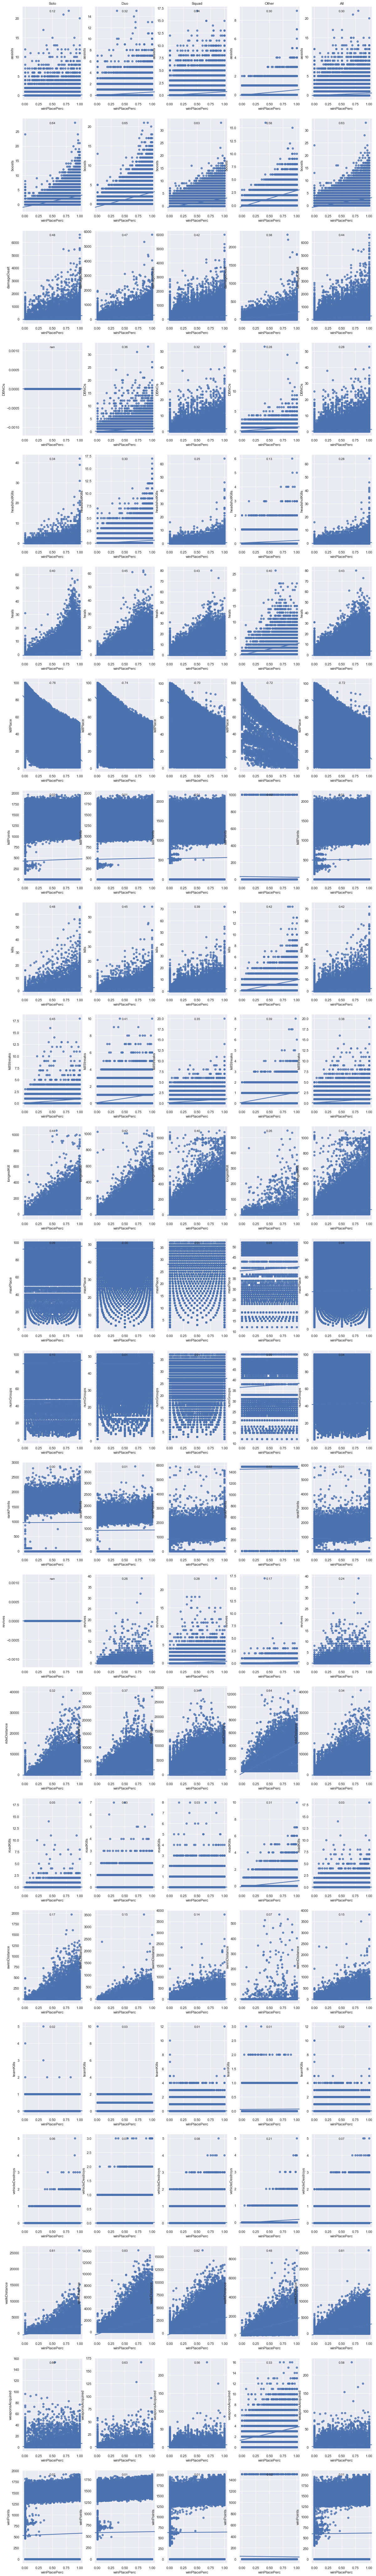

In [58]:
##################################################################
#  This Cell is taking too long and causing the Kernel to crash.
##################################################################

# Plot each feature for each game mode
fig = plt.figure(figsize=(20,150))
ax = []
for i in range(0, len(features)):
    for j in range (0, len(data)):
        fig.add_subplot(len(features), len(data), (j+1)+(i*len(data)))
        if (i == 0):
            ax.append(sns.regplot(x='winPlacePerc', y=features[i], data=data[j]))            
            ax[j].text(0.5, 0.95, '{:.2f}'.format(correlation[j][features[i]]), horizontalalignment='center',verticalalignment='center',transform=ax[j].transAxes)
            
        else:
            ax2 = sns.regplot(x='winPlacePerc', y=features[i], data=data[j])
            ax2.text(0.5, 0.95, '{:.2f}'.format(correlation[j][features[i]]), horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)


ax[0].set_title('Solo')
ax[1].set_title('Duo')
ax[2].set_title('Squad')
ax[3].set_title('Other')
ax[4].set_title('All')

## Pearson correlation between all features

### Solo

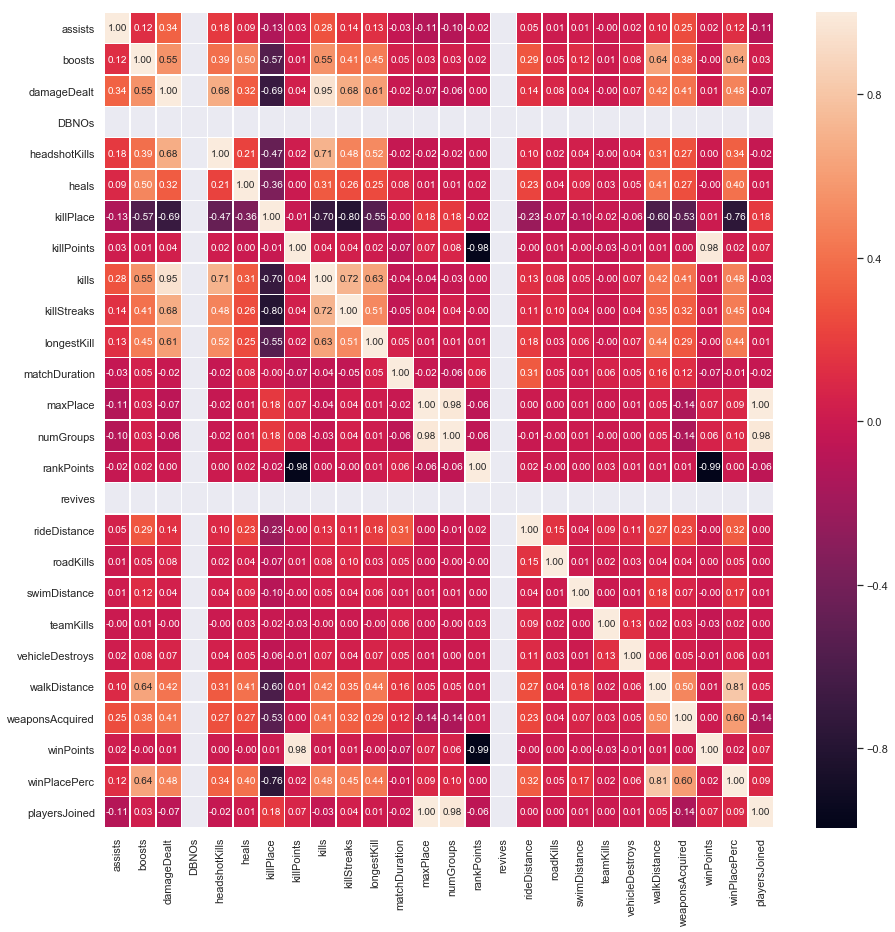

In [53]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(solo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

### Duo

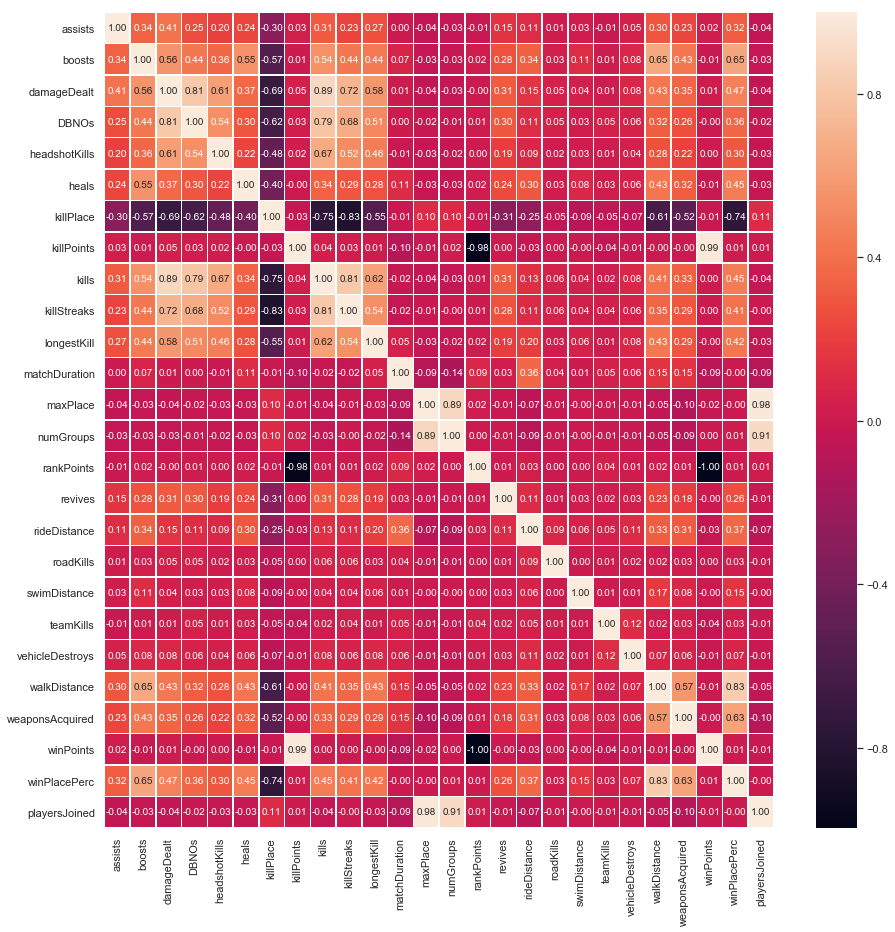

In [54]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(duo.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

### Squad

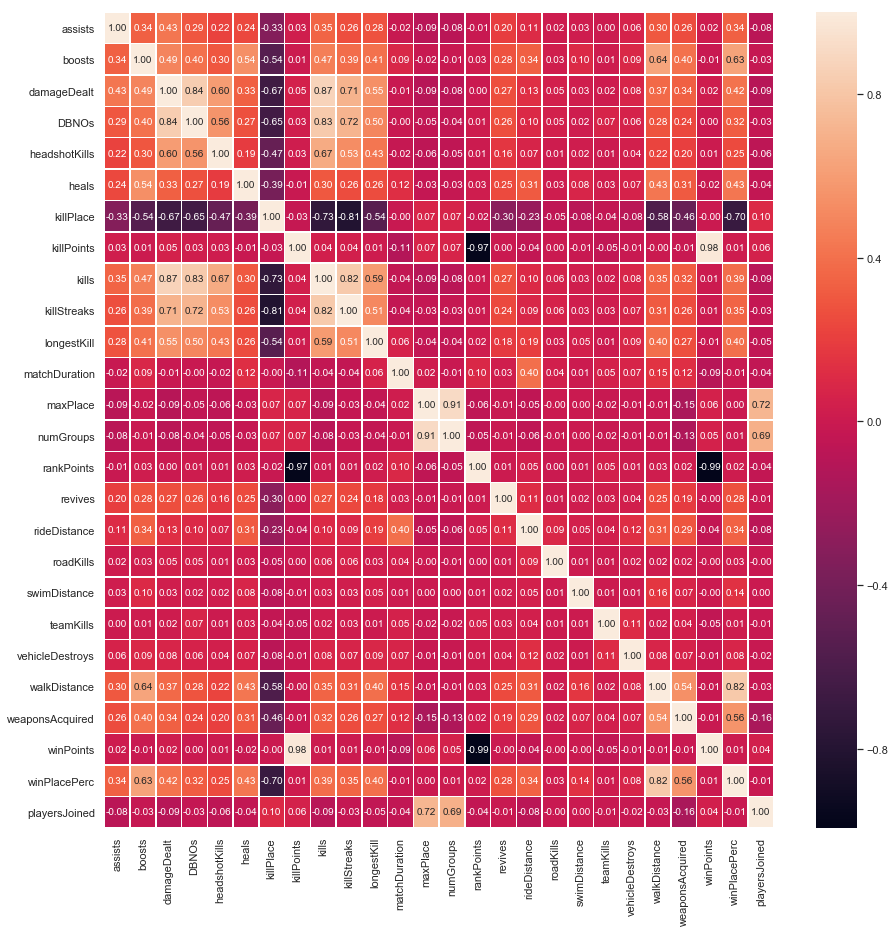

In [55]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(squad.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()


### Other

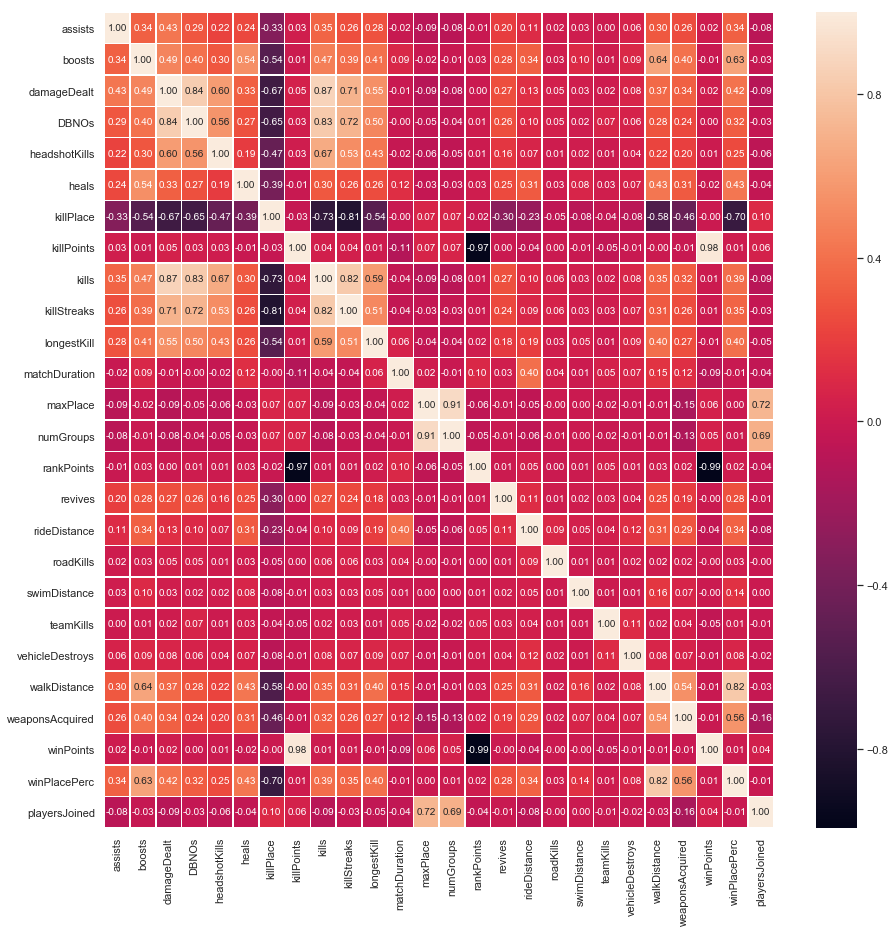

In [56]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(squad.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()


### All

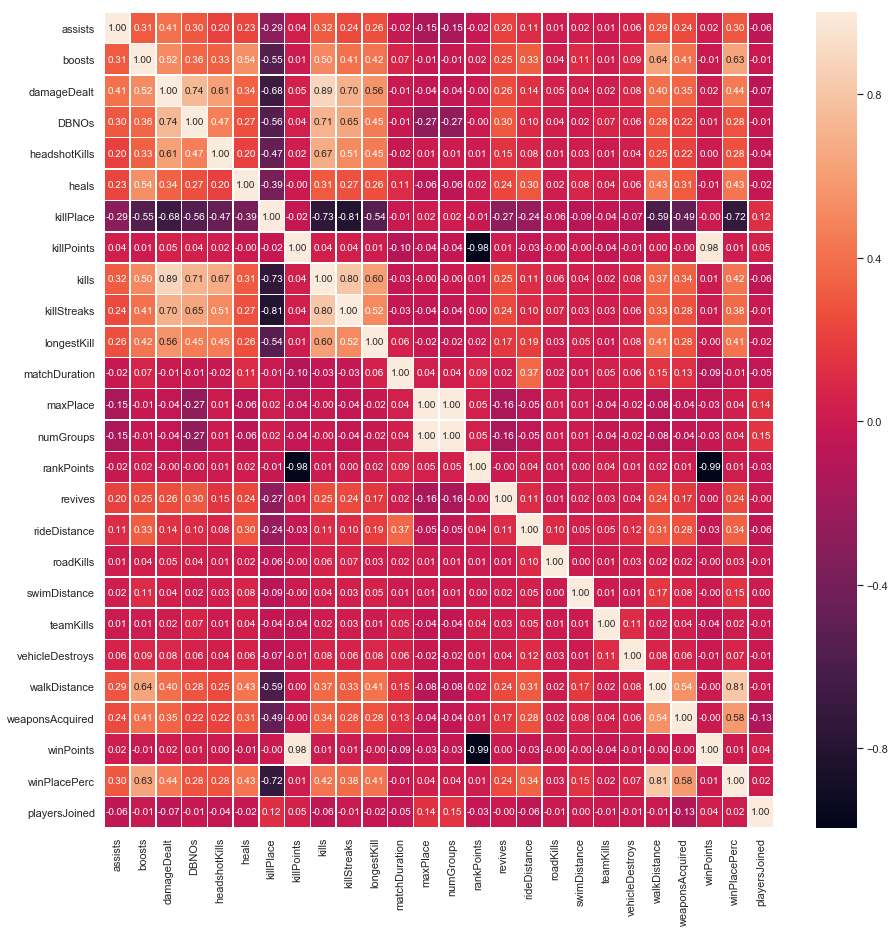

In [57]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()